# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [51]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd




In [54]:
# DESCARGA DE DATOS

# Convertimos los valores monetarios abreviados para solucionar errores más adelante

def convert_to_number(value):
    value = value.replace('$', '').replace(',', '')
    if 'B' in value: 
        return float(value.replace('B', '').replace(',', '')) * 1e9 
    elif 'M' in value: 
        return float(value.replace('M', '').replace(',', '')) * 1e6 
    elif 'K' in value: 
        return float(value.replace('K', '').replace('.', '')) * 1e3 
    return float(value)

# Función para limpiar los valores de año 
def clean_year(value): 
 return value.split()[0]

# Descargamos los datos y comprobamos que se descargan correctamente
url = "https://companiesmarketcap.com/tesla/revenue/"

response = requests.get(url)
if response.status_code == 200:
    html_content = response.text
    print("HTML descargado con éxito") 
else:
     print("Error al descargar la página web")


HTML descargado con éxito


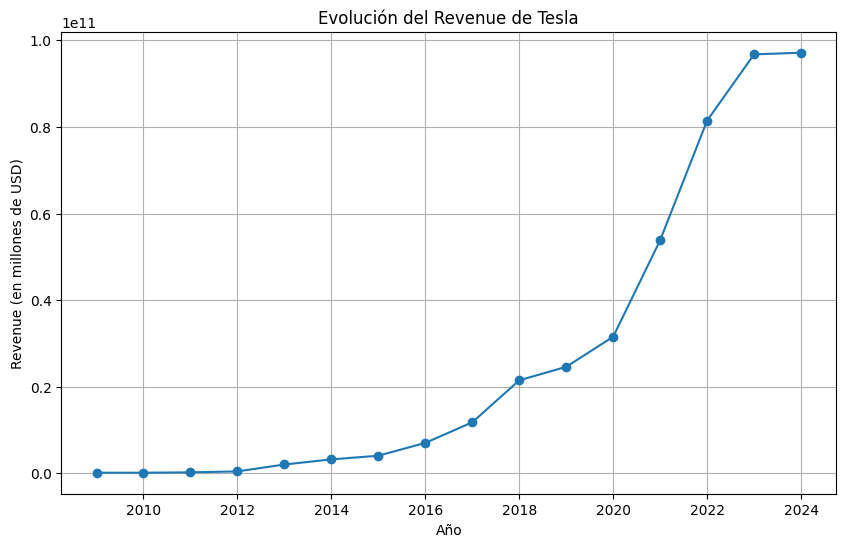

In [58]:
soup = BeautifulSoup(html_content,'html.parser')

# Encontrar la tabla que contiene la información de revenue 
table = soup.find('table')

data = []

for row in table.find_all('tr'): 
    columns = row.find_all('td') 
    if len(columns) > 1:
        year = columns[0].text.strip() 
        cleaned_year = clean_year(year)
        revenue = columns[1].text.strip() 
        revenue_number = convert_to_number(revenue) 
        data.append([cleaned_year, revenue_number])

# Creamos un Dataframe con los datos obtenidos y lo unificamos convirtiendo los datos en enteros

df = pd.DataFrame(data, columns=['Year','Revenue'])

df['Year'] = df['Year'].astype(int)

#ordenamos por año
df = df.sort_values('Year')

plt.figure(figsize=(10, 6)) 
plt.plot(df['Year'], df['Revenue'], marker='o') 
plt.title('Evolución del Revenue de Tesla') 
plt.xlabel('Año') 
plt.ylabel('Revenue (en millones de USD)') 
plt.grid(True) 
plt.show()